<a href="https://colab.research.google.com/github/wina-rahmawati/Food_Establishment_Inspection/blob/master/Text_Classification_FEI2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data_Comments/data_comments.csv')

In [3]:
data.shape

(606929, 3)

In [4]:
data.head()

,Unnamed: 0,Violation_Level,comments
0,0,1,Provide glass storage rack.
1,1,1,Provide dish rack over 3 bay sink to replace m...
2,2,1,Provide dish washer at ware washing area.
3,3,1,Provide mop sink at basement.
4,4,3,No hand sink at Bar Area provide.


In [5]:
data.loc[data["comments"]==' ']

,Unnamed: 0,Violation_Level,comments
22,22,1,
71,71,0,
85,85,0,
91,91,0,
117,117,1,
...,...,...,...
606889,606889,0,
606917,606917,0,
606918,606918,0,
606919,606919,0,


In [6]:
data['comments'] = data['comments'].replace({' ':'No Comment'})

In [7]:
def clean_text(text):
    text = text.lower()
    
    return text

In [8]:
data['comments'] = data.comments.apply(lambda x: clean_text(x))

In [9]:
data['comments'].unique()

array(['provide glass storage rack.',
       'provide dish rack over 3 bay sink to replace missing drainboards at each end of  3 bay sink.',
       'provide dish washer at ware washing area.', ...,
       'replace  missing ceiling tiles in the kitchen   reoair hole inj  the wall located above the prep table',
       'bulk food bin scoops submerged in product / remove and properly store',
       'stand up refrigerator condensor fan covers with visible dust build up / clean to remove'],
      dtype=object)

In [10]:
sentences = data['comments'].values
y = data['Violation_Level'].values

In [11]:
pd.value_counts(y)

1    430217
3    100209
2     42695
0     33808
dtype: int64

In [12]:
from wordcloud import STOPWORDS
def gen_freq(text):
    #will store the list of words
    word_list=[]
    
    #Loop over all the tweets and extract words into word_list
    for tw_words in text.split():
        word_list.extend(tw_words)
    
    #create word frequencies using word-list
    word_freq = pd.Series(word_list).value_counts()
    
    #drop the stopwords during frequency calculation
    word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')
    
    return word_freq

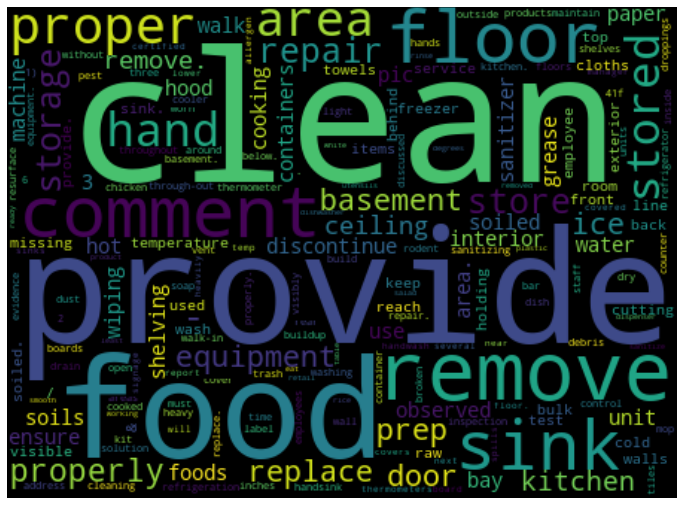

In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
word_freq = gen_freq(data["comments"].str)

#Generate Word Cloud
wc = WordCloud(width=450, height=330, max_words=200, background_color = 'black').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [14]:
#Menampung Label 0
data0 = pd.DataFrame(data[data['Violation_Level']==0])
data_urut0 = pd.DataFrame.reset_index(data0, drop = True)
data_urut0 = data_urut0.loc[:33807]
data_urut0.head()

,Unnamed: 0,Violation_Level,comments
0,71,0,no comment
1,85,0,no comment
2,91,0,no comment
3,152,0,no comment
4,155,0,no comment


In [15]:
#Menampung Label 1
data1 = pd.DataFrame(data[data['Violation_Level']==1])
data_urut1 = pd.DataFrame.reset_index(data1, drop = True)
data_urut1 = data_urut1.loc[:33807]
data_urut1.head()

,Unnamed: 0,Violation_Level,comments
0,0,1,provide glass storage rack.
1,1,1,provide dish rack over 3 bay sink to replace m...
2,2,1,provide dish washer at ware washing area.
3,3,1,provide mop sink at basement.
4,5,1,provide door and finish miscellaneous storage ...


In [16]:
#Menampung Label 2
data2 = pd.DataFrame(data[data['Violation_Level']==2])
data_urut2 = pd.DataFrame.reset_index(data2, drop = True)
data_urut2 = data_urut2.loc[:33807]
data_urut2

,Unnamed: 0,Violation_Level,comments
0,75,2,evidence of mice remove all droppings and pro...
1,143,2,evidence of mice remove all droppings and pro...
2,182,2,rear restroom/provide paper towels and toilet ...
3,192,2,caked on food debris on can opener blade. clea...
4,202,2,caked on food debris on can opener blade. clea...
...,...,...,...
33803,483449,2,keep rear kitchen door closed or provide scree...
33804,483461,2,provide proper storage of shellstock id tags i...
33805,483465,2,properly remove all evidence of dead cockroach...
33806,483492,2,no shellstock tags on site- provide as discussed


In [17]:
#Menampung Label 3
data3 = pd.DataFrame(data[data['Violation_Level']==3])
data_urut3 = pd.DataFrame.reset_index(data3, drop = True)
data_urut3 = data_urut3.loc[:33807]
data_urut3

,Unnamed: 0,Violation_Level,comments
0,4,3,no hand sink at bar area provide.
1,16,3,observed raw chicken stored over ready to eat ...
2,30,3,raw chicken and fish stored with cooked foods....
3,36,3,two hand sinks in kitchen. one blocked with a ...
4,41,3,white rice at 100f pork dish 87f and plantain...
...,...,...,...
33803,206406,3,eliminate bare hand contact with rte foods
33804,206414,3,provide
33805,206428,3,no comment
33806,206432,3,no food safety certificate on site. provide


In [18]:
dataAll = [data_urut0, data_urut1, data_urut2, data_urut3]
dataAll

[       Unnamed: 0  Violation_Level    comments
 0              71                0  no comment
 1              85                0  no comment
 2              91                0  no comment
 3             152                0  no comment
 4             155                0  no comment
 ...           ...              ...         ...
 33803      606889                0  no comment
 33804      606917                0  no comment
 33805      606918                0  no comment
 33806      606919                0  no comment
 33807      606921                0  no comment
 
 [33808 rows x 3 columns],
        Unnamed: 0  ...                                           comments
 0               0  ...                        provide glass storage rack.
 1               1  ...  provide dish rack over 3 bay sink to replace m...
 2               2  ...          provide dish washer at ware washing area.
 3               3  ...                      provide mop sink at basement.
 4               5  

In [19]:
data_gabung = pd.concat(dataAll)
data_gabung = pd.DataFrame.reset_index(data_gabung, drop=True)

In [20]:
data_gabung.head()

,Unnamed: 0,Violation_Level,comments
0,71,0,no comment
1,85,0,no comment
2,91,0,no comment
3,152,0,no comment
4,155,0,no comment


In [57]:
data_gabung

,Unnamed: 0,Violation_Level,comments,clean_text
0,71,0,no comment,no comment
1,85,0,no comment,no comment
2,91,0,no comment,no comment
3,152,0,no comment,no comment
4,155,0,no comment,no comment
...,...,...,...,...
135227,206406,3,eliminate bare hand contact with rte foods,eliminate bare hand contact with rte foods
135228,206414,3,provide,provide
135229,206428,3,no comment,no comment
135230,206432,3,no food safety certificate on site. provide,no food safety certificate on site. provide


In [58]:
sentences = data_gabung['comments'].values
y = data_gabung['Violation_Level'].values

In [59]:
def clean_text(text):    
    #Convert to lowercase to maintain consistency
    text = text.lower()
    
    return text

In [60]:
data_gabung['clean_text'] = data_gabung.comments.apply(lambda x: clean_text(x))

In [61]:
def gen_freq(text):
    #will store the list of words
    word_list=[]
    
    #Loop over all the tweets and extract words into word_list
    for tw_words in text.split():
        word_list.extend(tw_words)
    
    #create word frequencies using word-list
    word_freq = pd.Series(word_list).value_counts()
    
    #drop the stopwords during frequency calculation
    word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')
    
    return word_freq

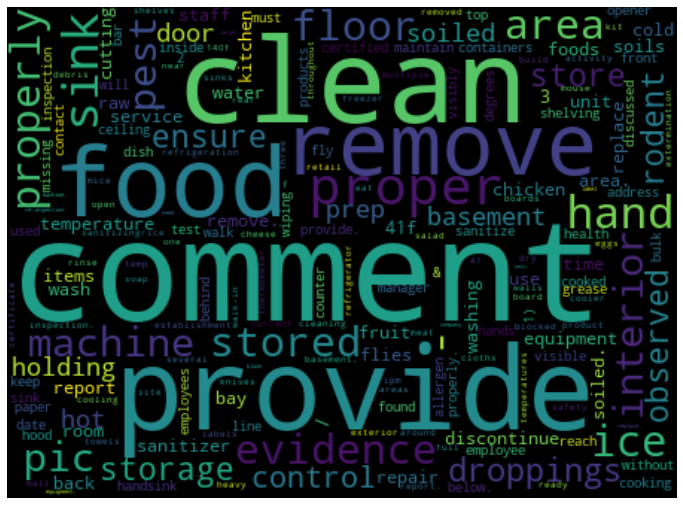

In [62]:
word_freq = gen_freq(data_gabung["clean_text"].str)

#Generate Word Cloud
wc = WordCloud(width=450, height=330, max_words=200, background_color = 'black').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [63]:
data_gabung['clean_text']

0                                                no comment
1                                                no comment
2                                                no comment
3                                                no comment
4                                                no comment
                                ...                        
135227           eliminate bare hand contact with rte foods
135228                                              provide
135229                                           no comment
135230          no food safety certificate on site. provide
135231    wash /rinse/sanitize/air dry all affected surf...
Name: clean_text, Length: 135232, dtype: object

In [64]:
y.shape

(135232,)

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_gabung['clean_text'], y, test_size=0.2, random_state=42)

In [66]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_train)

X_train = vectorizer.transform(X_train)
X_test  = vectorizer.transform(X_test)

In [68]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.8975856841793914


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [72]:
from sklearn.metrics import classification_report
ypred = classifier.predict(X_test)
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      6787
           1       0.90      0.87      0.88      6817
           2       0.91      0.83      0.87      6728
           3       0.90      0.89      0.90      6715

    accuracy                           0.90     27047
   macro avg       0.90      0.90      0.90     27047
weighted avg       0.90      0.90      0.90     27047



In [75]:
ypred

array([3, 3, 0, ..., 0, 3, 2])

In [78]:
#save model
import pickle

model = open('/content/drive/My Drive/Colab Notebooks/Data_Comments/modelNB.pckl', 'wb')
pickle.dump(modelNB,model)
model.close()